Task 04 using the “US Accidents” dataset. It will:

1) Load and inspect the data

2) Clean & preprocess timestamps

3) Analyze patterns by time of day, weather, and road/junction features

4) Visualize accident hotspots with both a static hexbin map and an interactive Folium heatmap


In [2]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b5/a8/5f764f333204db0390362a4356d03a43626997f26818a0e9396f1b3bd8c9/folium-0.20.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/113.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/113.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/113.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/113.4 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/113.4 kB 108.9 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/113.4 kB 150.6 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/113.4 kB 150.6 kB/s eta 0:0

In [3]:
# 0) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive map
import folium
from folium.plugins import HeatMap

In [7]:
# 1) Load the data
df = pd.read_csv(
    r'C:\Users\Rahma\Downloads\US_Accidents_March23.csv\US_Accidents_March23.csv',
    sep=','
)


In [8]:
# 2) Quick peek & datatypes
print("Shape:", df.shape)
display(df.head())
print(df.dtypes)

Shape: (7728394, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [9]:
# 3) Preprocess timestamps
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour']       = df['Start_Time'].dt.hour
df['Weekday']    = df['Start_Time'].dt.day_name()

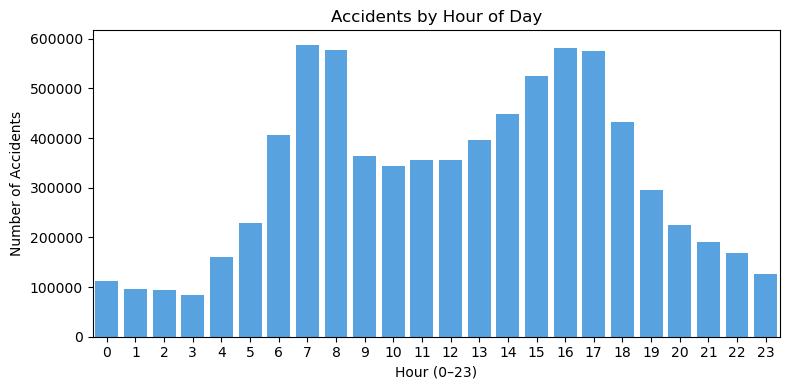

In [10]:
# 4) Time-of-day analysis
plt.figure(figsize=(8,4))
order = list(range(24))
sns.countplot(x='Hour', data=df, order=order, color='#42a5f5')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

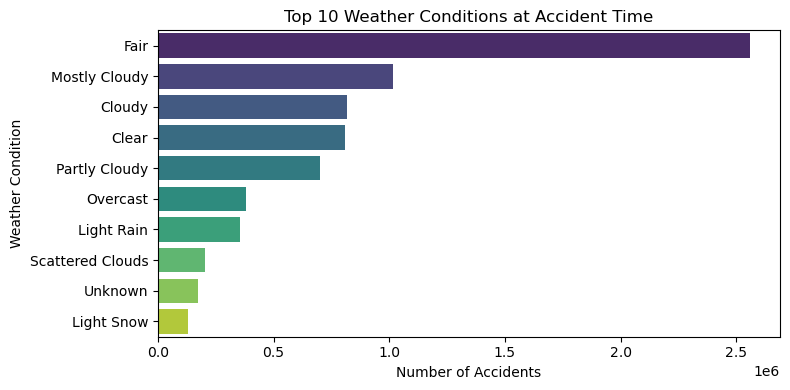

In [11]:
# 5) Weather conditions
top_weather = df['Weather_Condition'] \
    .fillna('Unknown') \
    .value_counts() \
    .head(10)
plt.figure(figsize=(8,4))
sns.barplot(
    x=top_weather.values,
    y=top_weather.index,
    palette='viridis'
)
plt.title("Top 10 Weather Conditions at Accident Time")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

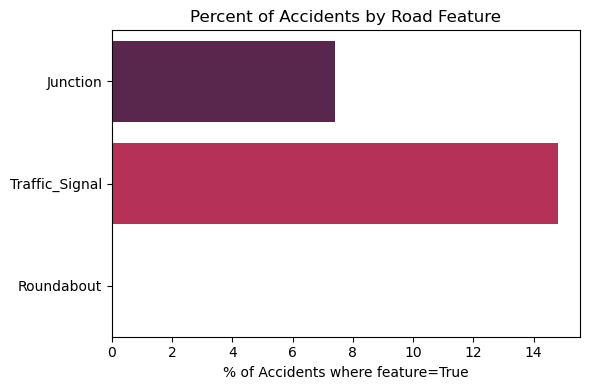

In [12]:
# 6) Road/junction features
#    e.g. percentage of accidents occurring at a junction or controlled by a signal
features = ['Junction', 'Traffic_Signal', 'Roundabout']
road_stats = {
    feat: df[feat].mean()*100  # mean of boolean → percent True
    for feat in features
}
plt.figure(figsize=(6,4))
sns.barplot(
    x=list(road_stats.values()),
    y=list(road_stats.keys()),
    palette='rocket'
)
plt.title("Percent of Accidents by Road Feature")
plt.xlabel("% of Accidents where feature=True")
plt.tight_layout()
plt.show()

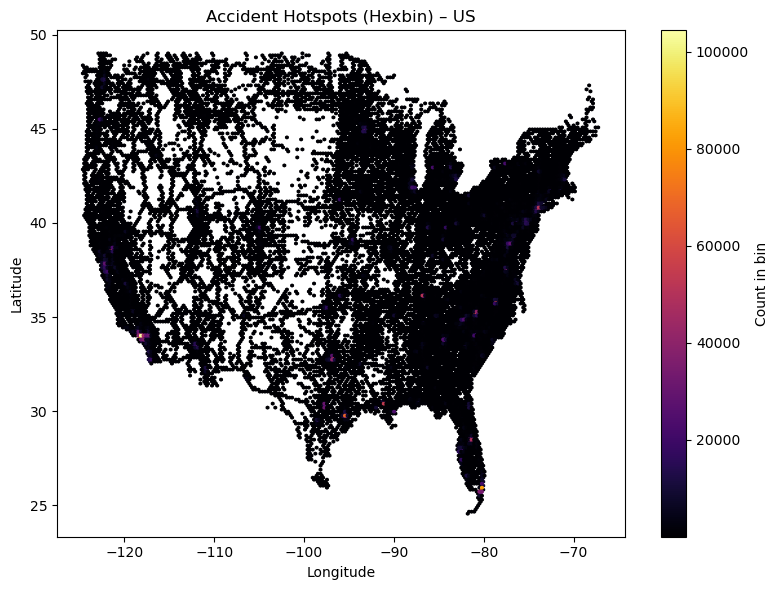

In [13]:
# 7) Static geographic hotspot (hexbin)
plt.figure(figsize=(8,6))
plt.hexbin(
    df['Start_Lng'], df['Start_Lat'],
    gridsize=200, cmap='inferno', mincnt=1
)
plt.colorbar(label='Count in bin')
plt.title("Accident Hotspots (Hexbin) – US")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

In [14]:
# 8) Interactive Folium heatmap
#    center on continental US
m = folium.Map(location=[39.5, -98.35], zoom_start=4, tiles='CartoDB dark_matter')

# sample if dataset is huge
sample = df[['Start_Lat','Start_Lng']].dropna().sample(20000, random_state=1)
HeatMap(sample.values.tolist(), radius=8, blur=4, max_zoom=6).add_to(m)

# display in Jupyter / save as HTML
m.save('us_accidents_heatmap.html')

In [15]:
m